# Merging the Data and Storing in a Database/Visualizing Data

Now that I have cleaned and transformed the three datasets, I want to load them into a database. 

## Loading Tables into SQL

I will be joining the website data using the book title. I have saved the three cleaned and transformed datasets as CSV files. I want to import them and load them into a SQLite database as individual tables.

In [1]:
# Import libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load the CSV files
csvbooks = pd.read_csv('clean_csvbooks.csv')
wikibooks = pd.read_csv('clean_wikibooks.csv')
apibooks = pd.read_csv('clean_apibooks.csv')

In [4]:
# Load the datasets into the SQLite database as individual tables
with sqlite3.connect('books.db') as conn:
    cursor = conn.cursor()
    csvbooks.to_sql('csv', conn, if_exists='replace')
    wikibooks.to_sql('wiki', conn, if_exists='replace')
    apibooks.to_sql('api', conn, if_exists='replace')
    conn.commit()

C:\Users\femaa001\Anaconda3\envs\r_env\lib\site-packages\pandas\core\generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


Next, I want to join the datasets together to create one dataset. First, I will join the website data and the API data on the 'title_lower' field. Then, I will join the flat source data and the API data on the 'isbn13' field.  

In [5]:
data = []
cursor.execute('PRAGMA foreign_keys = 1')
sql = '''
    SELECT * FROM wiki
    JOIN api ON api.title_lower = wiki.title_lower
    JOIN csv ON csv.isbn13 = api.isbn13
    '''

rows = cursor.execute(sql)
for row in rows:
    data.append(row)

Now, I want to put the SQL query into a pandas DataFrame.

In [6]:
headers = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=headers)

In [7]:
df.head()

,index,title,authors,original language,first published,sales,title_lower,index,info_url,preview_url,...,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year,title_lower
0,0,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,harry potter and the philosopher's stone,10509,https://openlibrary.org/books/OL8786504M/Harry...,https://openlibrary.org/books/OL8786504M/Harry...,...,J.K. Rowling,4.47,9781582346816,gla,250,11,0,Bloomsbury USA Childrens,2010.0,harry potter and the philosopher's stone
1,3,The Hobbit,J. R. R. Tolkien,English,1937,100.0,the hobbit,1671,https://openlibrary.org/books/OL7604539M/The_H...,https://openlibrary.org/books/OL7604539M/The_H...,...,J.R.R. Tolkien,4.27,9780618260300,eng,366,2530894,32871,Houghton Mifflin,2002.0,the hobbit or there and back again
2,3,The Hobbit,J. R. R. Tolkien,English,1937,100.0,the hobbit,1674,https://openlibrary.org/books/OL8875466M/The_H...,https://openlibrary.org/books/OL8875466M/The_H...,...,J.R.R. Tolkien,4.27,9781594130052,eng,481,276,43,Large Print Press,2003.0,the hobbit: or there and back again
3,3,The Hobbit,J. R. R. Tolkien,English,1937,100.0,the hobbit,1675,https://openlibrary.org/books/OL9786619M/The_h...,https://openlibrary.org/books/OL9786619M/The_h...,...,J.R.R. Tolkien,4.27,9780261103283,eng,277,3213,329,HarperCollins,2007.0,the hobbit
4,3,The Hobbit,J. R. R. Tolkien,English,1937,100.0,the hobbit,6169,https://openlibrary.org/books/OL10236412M/The_...,https://openlibrary.org/books/OL10236412M/The_...,...,J.R.R. Tolkien/Alan Lee,4.27,9780261103306,eng,289,559,55,Houghton Mifflin Company,1997.0,the hobbit or there and back again


In [8]:
df.columns

Index(['index', 'title', 'authors', 'original language', 'first published',
       'sales', 'title_lower', 'index', 'info_url', 'preview_url',
       'thumbnail_url', 'preview', 'title', 'revision', 'genres', 'languages',
       'subjects', 'publish_country', 'publishers', 'created', 'notes',
       'pages', 'format', 'description', 'author', 'isbn13', 'modified',
       'year', 'title_lower', 'index', 'title', 'authors', 'average_rating',
       'isbn13', 'language_code', 'num_pages', 'ratings_count',
       'text_reviews_count', 'publisher', 'publication_year', 'title_lower'],
      dtype='object')

I want to drop columns that are irrelevant or contain repetitive information and rename the existing columns.

In [9]:
# Drop columns
df.drop(['index', 'title_lower', 'info_url', 'preview_url', 'thumbnail_url', 'preview', 'isbn13', 
         'pages', 'publish_country', 'year'], axis=1, inplace=True)

# Rename columns
df.columns = ['title', 'author', 'original_language', 'first_published', 'sales', 'title_api', 'revision', 
              'genres', 'language', 'subjects', 'publishers', 'created', 'notes', 'format', 
              'description', 'author_api', 'modified', 'title_csv', 'authors_csv', 'average_rating', 
              'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publisher', 'publication_year']

In [10]:
df.isnull().sum()

title                  0
author                 0
original_language      0
first_published        0
sales                  0
title_api              0
revision               0
genres                65
language               9
subjects              38
publishers             0
created                0
notes                 54
format                 0
description           52
author_api            16
modified               0
title_csv              0
authors_csv            0
average_rating         0
language_code          0
num_pages              0
ratings_count          0
text_reviews_count     0
publisher              0
publication_year       0
dtype: int64

I want to remove the columns with large amounts of missing data and those with additional repetitive information. 

In [11]:
df.drop(['title_api', 'genres', 'language', 'subjects', 'notes', 'description', 'author_api', 'title_csv', 'authors_csv',
         'language_code'], axis=1, inplace=True)

Finally, I can load this data in a new table of the SQLite database and load the new table into a pandas DataFrame.

In [12]:
df.to_sql('books', conn, if_exists='replace')
conn.commit()

In [13]:
data = []
cursor.execute('PRAGMA foreign_keys = 1')
sql = '''
    SELECT * FROM books
    '''

rows = cursor.execute(sql)
for row in rows:
    data.append(row)

In [14]:
headers = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=headers)

In [15]:
# I want to drop the index column
df.drop(['index'], axis=1, inplace=True)

## Data Visualization

Next, I want to create visualizations using the data in the 'books' table. I will be using Seaborn for all visuals. First, I will create histograms of all numerical variables. 

In [16]:
# This will return the numerical variables
num_vars = df.select_dtypes(include=[np.int64, np.float64]).columns.tolist()

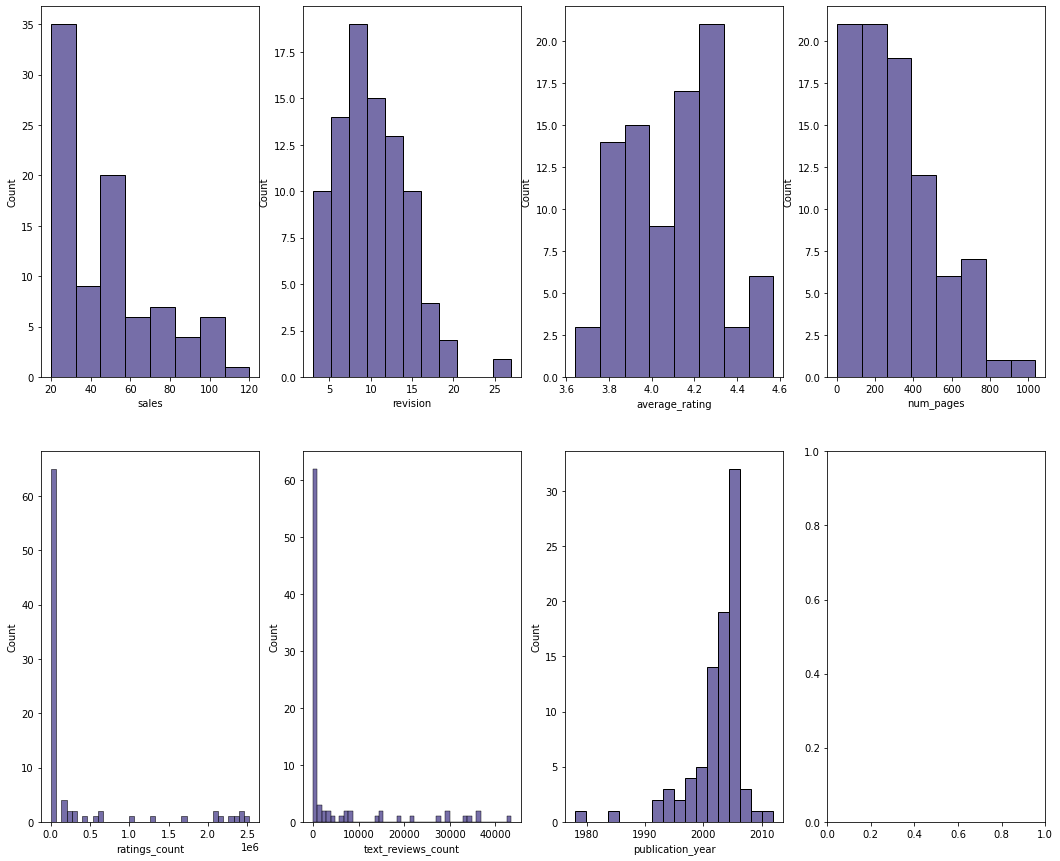

In [17]:
# Plot histograms
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18,15))
for var, ax in zip(num_vars, axes.flatten()):
    sns.histplot(data=df, x=var, ax=ax, color='darkslateblue')

Next, I will create bar plots of the categorical variables. 

In [18]:
# This will return the categorical variables
cat_vars = df.select_dtypes(include=[np.object]).columns.tolist()

C:\Users\femaa001\Anaconda3\envs\r_env\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [19]:
# I want to look at how many unique classes are in each categorical variable
for var in cat_vars:
    num = df[var].nunique()
    print(var, num)

title 43
author 35
original_language 3
first_published 38
publishers 66
created 36
format 5
modified 84
publisher 71


In [20]:
# I just want to look at those with few unique categories
cat_vars = ['original_language', 'format']

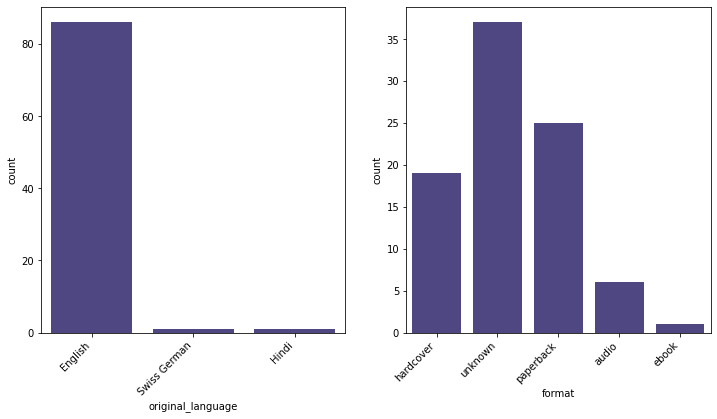

In [21]:
# Plot bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for var, ax in zip(cat_vars, axes.flatten()):
    sns.countplot(data=df, x=var, ax=ax, color='darkslateblue')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

Next, I will create two bar plots. The first will show mean book sales grouped by the original language the book was written in. The second will show the mean average book rating grouped by the original language. The 'original language' and 'sales' variables were originally from the wiki table, and the 'average rating' variable was originally from the csv table.

In [22]:
by_lang = df.groupby('original_language')
lang_names = by_lang.describe().index
sales_mean = by_lang.describe()['sales']['mean']
rating_mean = by_lang.describe()['average_rating']['mean']

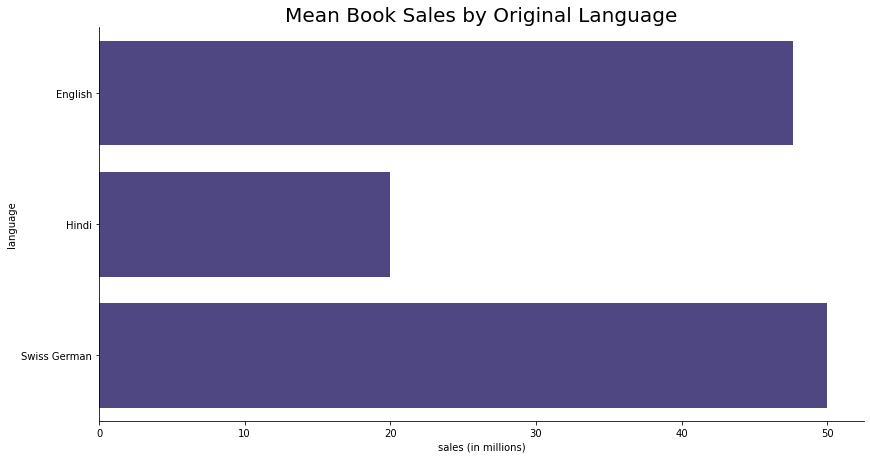

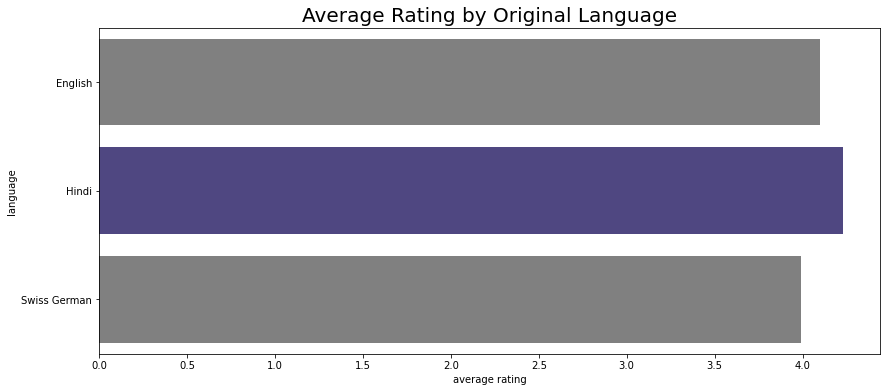

In [23]:
# Bar plot of mean book sales by original language
sns.catplot(x=sales_mean, y=lang_names, data=df, kind='bar', color='darkslateblue', height=6, aspect=2)
plt.title('Mean Book Sales by Original Language', size=20)
plt.xlabel('sales (in millions)')
plt.ylabel('language')
plt.show()

# Bar plot of average rating by original language
color = ['grey' if (x < max(rating_mean)) else 'darkslateblue' for x in rating_mean] # To highlight language with max rating
plt.figure(figsize=(14, 6))
splot=sns.barplot(x=rating_mean, y=lang_names, data=df, palette=color)
plt.title('Average Rating by Original Language', size=20)
plt.xlabel('average rating')
plt.ylabel('language')
plt.show()

Next, I will create two scatter plots. The first will show the rating count and book sales and will include a regression line. The second scatter plot will show the year the book was first published and the number of pages of the book. I will be incorporating a third variable, book format. I do not want to include format classes unknown and audio. The 'first published', ' num pages', and 'format' variables were originally from the wiki table, csv table, and api table, respectively. 

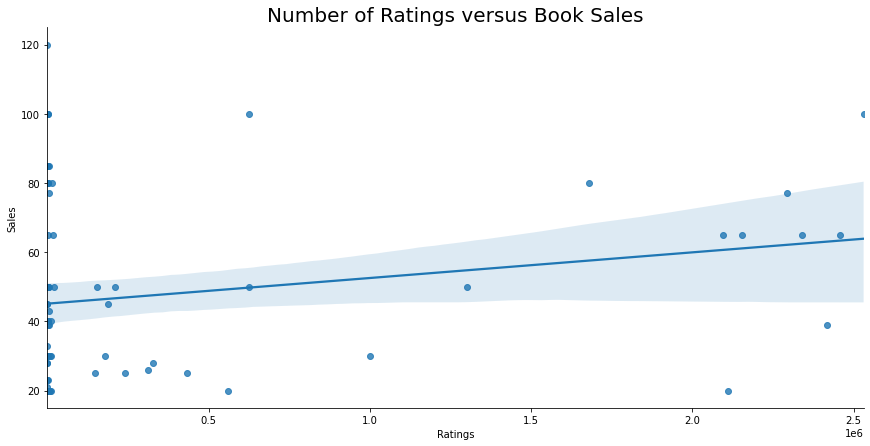

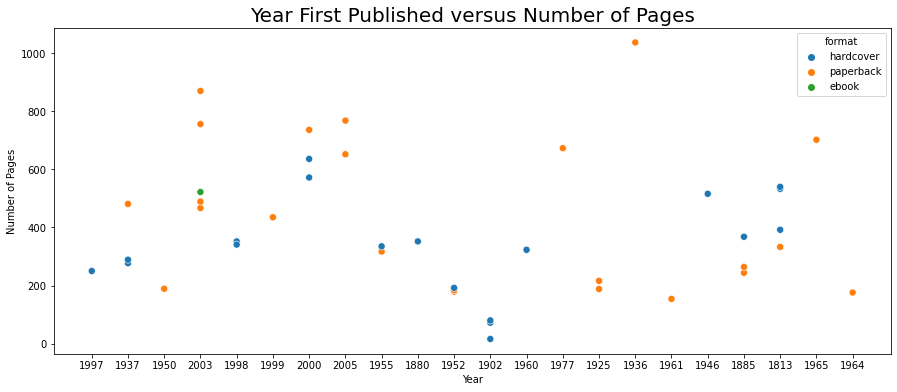

In [24]:
sns.lmplot(x='ratings_count', y='sales', data=df, height=6, aspect=2)
plt.title('Number of Ratings versus Book Sales', size=20)
plt.xlabel('Ratings')
plt.ylabel('Sales')
plt.show()

forms = df[(df['format']!='unknown') & (df['format']!='audio')] # To remove unknown and audio formats
fig = plt.subplots(figsize=(15, 6))
sns.scatterplot(x='first_published', y='num_pages', hue='format', data=forms, s=50)
plt.title('Year First Published versus Number of Pages', size=20)
plt.xlabel('Year')
plt.ylabel('Number of Pages')
plt.show()

Finally, I want to create a heatmap of the correlation of numerical variables in the books table. 

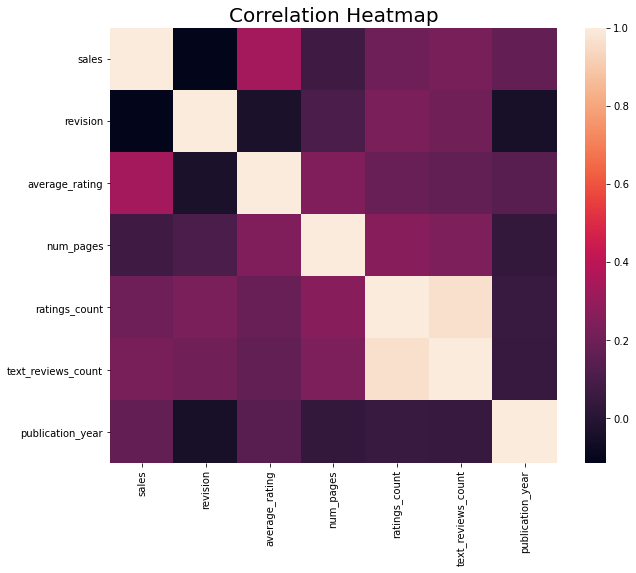

In [25]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.title('Correlation Heatmap', size=20)
plt.show()

## Summary of Project Learnings

This project provide many learning opportunities. The first milestone consisted of selecting data from three different data sources with different file types that shared a common relationship. I agree that this was the most challenging part of the project. It was relatively easy to find data with different file types; however, finding data with a common relationship, or one that could be created, was difficult. Finding an API to work with seemed the most difficult, as I had very little experience with APIs when I initially chose my data. Therefore, I chose the API data source first and based my searched for the other two sources on it. The other milestones involved cleaning the data obtained from the three sources and merging them in SQL to create visuals. The tasks required in each milestone were straight-forward and fairly easy to accomplish because of the way the course content was structured. The content coincided perfectly with the tasks of each milestone. For example, Milestone 4 involved cleaning data retrieved after connecting and pulling data from an API. Prior to learning the content that was introduced in weeks 9 and 10, this seemed like this would be a difficult task. However, the readings and exercises focused on APIs, including connecting and pulling data from the Twitter API. I feel that the project, as a whole, provided an in-depth explanation of the data wrangling process from start to finish. As a hands-on learner, I feel like it provided me with a solid understanding of data wrangling.  